In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
class KNN:
    def __init__(self, n = 2):
        self.n = n
        self.history = {}

    def fit(self, data, n):
        self.n = n
        self.data = data

    def train(self, epochs = 1000):
        self.centroids = self._initialise_centroids()
        self.history["centroids"] = []

        for i in range(epochs):

            knn_sum = np.zeros(shape=(self.n, self.data.shape[1]))
            knn_count = np.zeros(shape=(self.n, 1))

            for x in self.data:
                dist = np.argmin(((self.centroids-x)**2).sum(axis=1))
                knn_sum[dist] = knn_sum[dist] + x
                knn_count[dist] += 1

            self.centroids = knn_sum / (knn_count + 0.00001)
            if i%100 ==0 :
                self.history["centroids"].append(self.centroids)

    def _initialise_centroids(self):
        centroids = np.empty(shape=(self.n, self.data.shape[1]))
        for i in range(self.data.shape[1]):
            low = self.data[:,i].min()
            high = self.data[:,i].max()
            centroids[:,i] =  np.random.uniform(low=low, high=high, size=centroids[:,i].shape)

        return centroids
    
    def gethistory(self):
        return self.history

In [18]:
a = np.array([[1,2],[4,5]])
b  = np.array([[3,4]])
c = np.argmin(((a-b)**2).sum(axis=1))
c
((a-b)**2).sum(axis=1)

array([8, 2], dtype=int32)

In [20]:
data = np.empty(shape=(50, 2))
data[:15, :] = np.random.uniform(low=0, high=15, size=(15, 2))
data[15:30, :] = np.random.uniform(low=15, high=30, size=(15, 2))
data[30:, :] = np.random.uniform(low=30, high=45, size=(20, 2))

In [21]:
data

array([[ 3.1832308 ,  4.81755057],
       [ 7.63153438,  5.86589416],
       [ 4.11122092,  3.88843093],
       [ 1.95418195,  1.97699088],
       [13.18478759,  8.40591749],
       [ 1.58896016, 12.57406154],
       [11.89861325,  8.80179743],
       [ 5.26610659,  4.63959904],
       [10.06854652,  6.36099038],
       [ 1.99508249, 13.82486242],
       [ 8.16437731,  3.1301538 ],
       [ 2.59936518,  8.5559705 ],
       [ 7.77237713, 11.18699144],
       [ 1.54345013,  3.31468544],
       [ 7.42587417,  5.8692152 ],
       [28.37573799, 21.45775264],
       [17.10831531, 26.47872009],
       [27.45191175, 27.44016059],
       [24.73393856, 20.23831338],
       [25.79860629, 19.49919486],
       [23.98121594, 16.63671326],
       [20.77319643, 17.74139204],
       [18.67883327, 28.15626972],
       [15.09944972, 16.35044155],
       [23.11875236, 20.32481591],
       [29.20860123, 28.48157372],
       [15.98659611, 23.58243049],
       [18.84268149, 24.81420524],
       [25.88880832,

In [22]:
clf = KNN()
clf.fit(data, 3)

In [23]:
clf.train(2000)

[[  69.70524268   48.93898931]
 [1088.15584076 1084.95238355]
 [  18.6824659    54.27412192]]
[[ 9.]
 [35.]
 [ 6.]]
[[  84.80469239   65.28943085]
 [1073.05639105 1068.601942  ]
 [  18.6824659    54.27412192]]
[[10.]
 [34.]
 [ 6.]]
[[ 111.39608401   92.24082346]
 [1052.28319461 1050.86054995]
 [  12.86427072   45.06412136]]
[[11.]
 [33.]
 [ 6.]]
[[ 141.98656855  123.93193723]
 [1012.31538257 1010.64140621]
 [  22.24159822   53.59215133]]
[[11.]
 [31.]
 [ 8.]]
[[177.83453184 180.68441532]
 [953.24563341 939.02366497]
 [ 45.46338409  68.45741448]]
[[11.]
 [28.]
 [11.]]
[[245.68211105 243.68616666]
 [855.6585173  849.67213438]
 [ 75.20292099  94.80719373]]
[[12.]
 [24.]
 [14.]]
[[315.40681929 313.27566519]
 [772.74902147 771.67671836]
 [ 88.38770858 103.21311122]]
[[14.]
 [21.]
 [15.]]
[[344.61542053 341.75723891]
 [743.54042024 743.19514463]
 [ 88.38770858 103.21311122]]
[[15.]
 [20.]
 [15.]]
[[344.61542053 341.75723891]
 [743.54042024 743.19514463]
 [ 88.38770858 103.21311122]]
[[15.]
 

In [25]:
centroids = clf.gethistory()["centroids"]
centroids

[array([[ 7.74501836,  5.43765944],
        [31.090158  , 30.99863067],
        [ 3.11373913,  9.04567191]]),
 array([[22.97434605, 22.78380074],
        [37.17700242, 37.15973865],
        [ 5.89250998,  6.88086949]]),
 array([[22.97434605, 22.78380074],
        [37.17700242, 37.15973865],
        [ 5.89250998,  6.88086949]]),
 array([[22.97434605, 22.78380074],
        [37.17700242, 37.15973865],
        [ 5.89250998,  6.88086949]]),
 array([[22.97434605, 22.78380074],
        [37.17700242, 37.15973865],
        [ 5.89250998,  6.88086949]]),
 array([[22.97434605, 22.78380074],
        [37.17700242, 37.15973865],
        [ 5.89250998,  6.88086949]]),
 array([[22.97434605, 22.78380074],
        [37.17700242, 37.15973865],
        [ 5.89250998,  6.88086949]]),
 array([[22.97434605, 22.78380074],
        [37.17700242, 37.15973865],
        [ 5.89250998,  6.88086949]]),
 array([[22.97434605, 22.78380074],
        [37.17700242, 37.15973865],
        [ 5.89250998,  6.88086949]]),
 array([[2

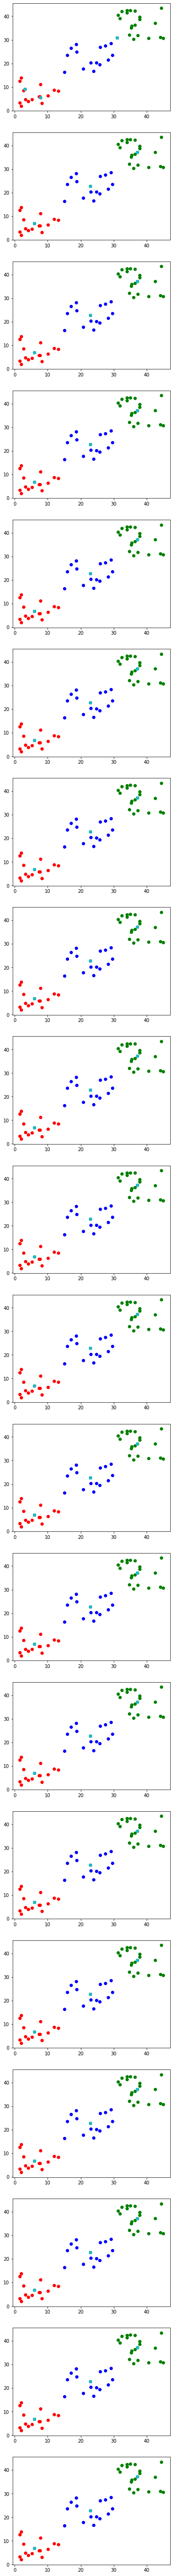

In [30]:

marker_color = ["b", "g", "r"]
fig, axs = plt.subplots(len(centroids))
fig.set_figheight(100)

for i in range(len(centroids)):

    for x in data:
        j = np.argmin(((centroids[-1]-x)**2).sum(axis=1))
        axs[i].scatter(x[0], x[1], c=marker_color[j])
        axs[i].scatter(centroids[i][:, 0], centroids[i][:, 1])
plt.show()